In [54]:
import pandas as pd


In [55]:
import pandas as pd

# Assuming the user wants to read the 'Uber-Jan-Feb-FOIL.csv' file
df = pd.read_csv('/content/Uber-Jan-Feb-FOIL.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [56]:
df.info()
df.isna().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [57]:
df["date"] = pd.to_datetime(df["date"])

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["weekday"] = df["date"].dt.day_name()
df["week"] = df["date"].dt.isocalendar().week.astype(int)

df["trips_per_vehicle"] = df["trips"] / df["active_vehicles"]


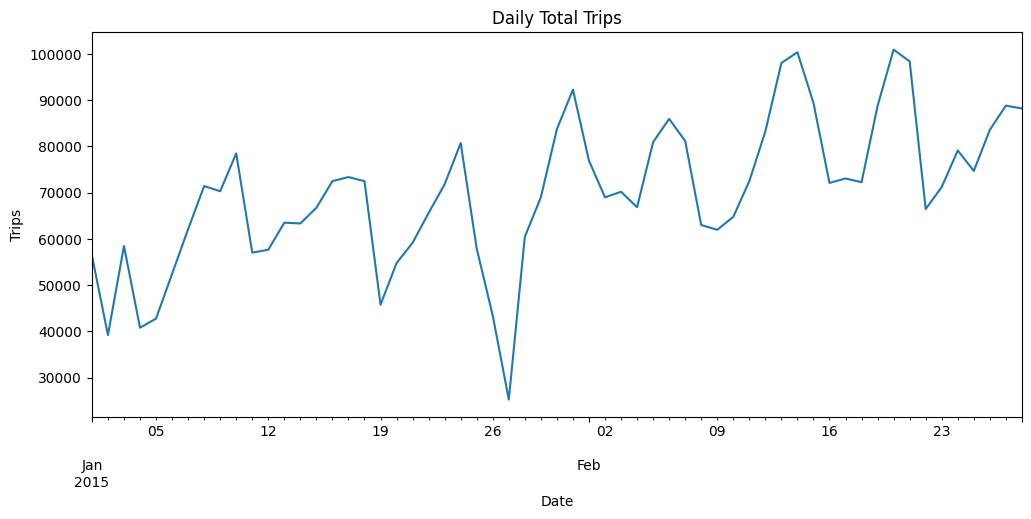

In [58]:
import matplotlib.pyplot as plt

daily = df.groupby("date")["trips"].sum()

daily.plot(figsize=(12,5))
plt.title("Daily Total Trips")
plt.xlabel("Date")
plt.ylabel("Trips")
plt.show()


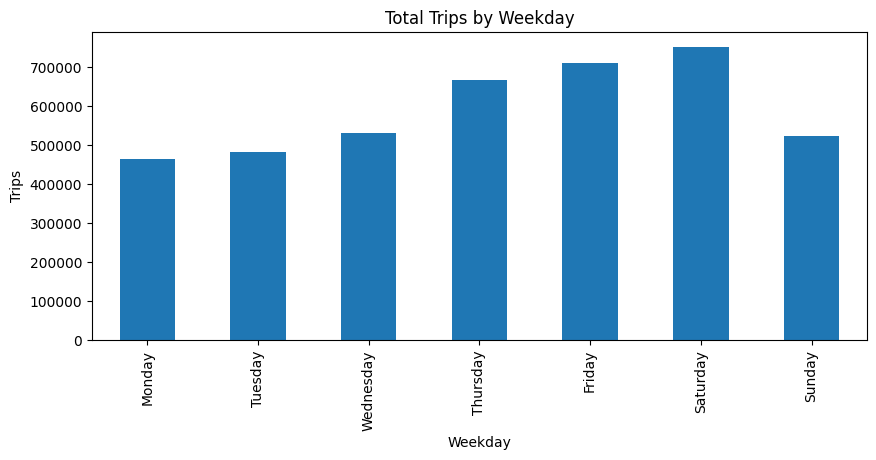

In [59]:
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
w = df.groupby("weekday")["trips"].sum().reindex(weekday_order)

w.plot(kind="bar", figsize=(10,4))
plt.title("Total Trips by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Trips")
plt.show()


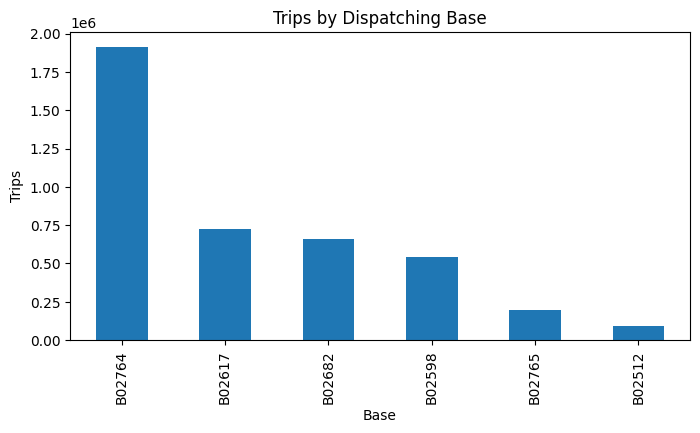

In [60]:
base_trips = df.groupby("dispatching_base_number")["trips"].sum().sort_values(ascending=False)

base_trips.plot(kind="bar", figsize=(8,4))
plt.title("Trips by Dispatching Base")
plt.xlabel("Base")
plt.ylabel("Trips")
plt.show()


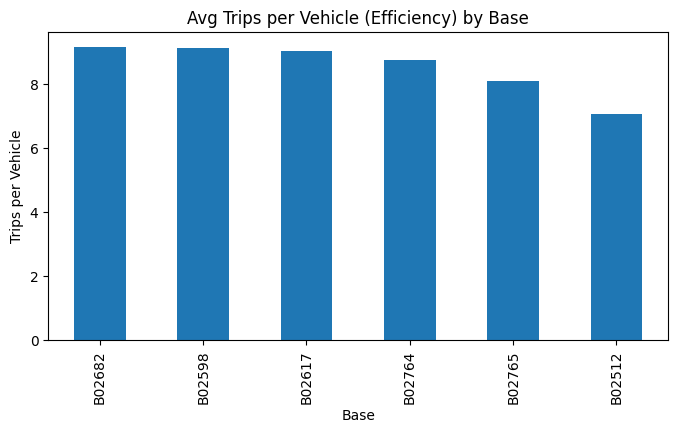

In [61]:
base_eff = df.groupby("dispatching_base_number")["trips_per_vehicle"].mean().sort_values(ascending=False)

base_eff.plot(kind="bar", figsize=(8,4))
plt.title("Avg Trips per Vehicle (Efficiency) by Base")
plt.xlabel("Base")
plt.ylabel("Trips per Vehicle")
plt.show()


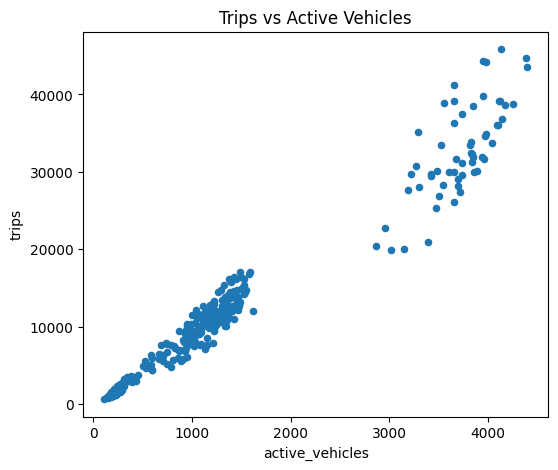

Correlation: 0.9804925397246566


In [62]:
df.plot.scatter(x="active_vehicles", y="trips", figsize=(6,5))
plt.title("Trips vs Active Vehicles")
plt.show()

corr = df[["active_vehicles","trips"]].corr().iloc[0,1]
print("Correlation:", corr)


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

daily_df = df.groupby("date")["trips"].sum().reset_index().sort_values("date")

daily_df["lag1"] = daily_df["trips"].shift(1)
daily_df["lag2"] = daily_df["trips"].shift(2)
daily_df["lag7"] = daily_df["trips"].shift(7)
daily_df = daily_df.dropna()

X = daily_df[["lag1","lag2","lag7"]]
y = daily_df["trips"]

# zaman serisi olduğu için shuffle=False
split_idx = int(len(daily_df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))


MAE: 6407.066751068898


In [64]:
print ("Shape:", df.shape)
df.info()

Shape: (354, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
 4   year                     354 non-null    int32         
 5   month                    354 non-null    int32         
 6   day                      354 non-null    int32         
 7   weekday                  354 non-null    object        
 8   week                     354 non-null    int64         
 9   trips_per_vehicle        354 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(3), int64(3), object(2)
memory usage: 23.6+ KB


In [65]:
df.isnull().sum()

,0
dispatching_base_number,0
date,0
active_vehicles,0
trips,0
year,0
month,0
day,0
weekday,0
week,0
trips_per_vehicle,0


In [66]:
df.describe

<bound method NDFrame.describe of     dispatching_base_number       date  active_vehicles  trips  year  month  \
0                    B02512 2015-01-01              190   1132  2015      1   
1                    B02765 2015-01-01              225   1765  2015      1   
2                    B02764 2015-01-01             3427  29421  2015      1   
3                    B02682 2015-01-01              945   7679  2015      1   
4                    B02617 2015-01-01             1228   9537  2015      1   
..                      ...        ...              ...    ...   ...    ...   
349                  B02764 2015-02-28             3952  39812  2015      2   
350                  B02617 2015-02-28             1372  14022  2015      2   
351                  B02682 2015-02-28             1386  14472  2015      2   
352                  B02512 2015-02-28              230   1803  2015      2   
353                  B02765 2015-02-28              747   7753  2015      2   

     day   weekday  week  trips_per_vehicle  
0      1  Thursday     1           5.957895  
1      1  Thursday     1           7.844444  
2      1  Thursday     1           8.585060  
3      1  Thursday     1           8.125926  
4      1  Thursday     1           7.766287  
..   ...       ...   ...                ...  
349   28  Saturday     9          10.073887  
350   28  Saturday     9          10.220117  
351   28  Saturday     9          10.441558  
352   28  Saturday     9           7.839130  
353   28  Saturday     9          10.378849  

[354 rows x 10 columns]>

In [67]:
df["date"] = pd.to_datetime(df["date"])


In [68]:
df.dtypes


,0
dispatching_base_number,object
date,datetime64[ns]
active_vehicles,int64
trips,int64
year,int32
month,int32
day,int32
weekday,object
week,int64
trips_per_vehicle,float64


In [69]:
df["dispatching_base_number"].nunique()


6

In [70]:
df["dispatching_base_number"].unique()


array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

In [71]:
df["dispatching_base_number"].value_counts()


,count
dispatching_base_number,
B02512,59
B02765,59
B02764,59
B02682,59
B02617,59
B02598,59


In [72]:
df["trips_per_vehicle"] = df["trips"] / df["active_vehicles"]
df.head()


,dispatching_base_number,date,active_vehicles,trips,year,month,day,weekday,week,trips_per_vehicle
0,B02512,2015-01-01,190,1132,2015,1,1,Thursday,1,5.957895
1,B02765,2015-01-01,225,1765,2015,1,1,Thursday,1,7.844444
2,B02764,2015-01-01,3427,29421,2015,1,1,Thursday,1,8.585060
3,B02682,2015-01-01,945,7679,2015,1,1,Thursday,1,8.125926
4,B02617,2015-01-01,1228,9537,2015,1,1,Thursday,1,7.766287


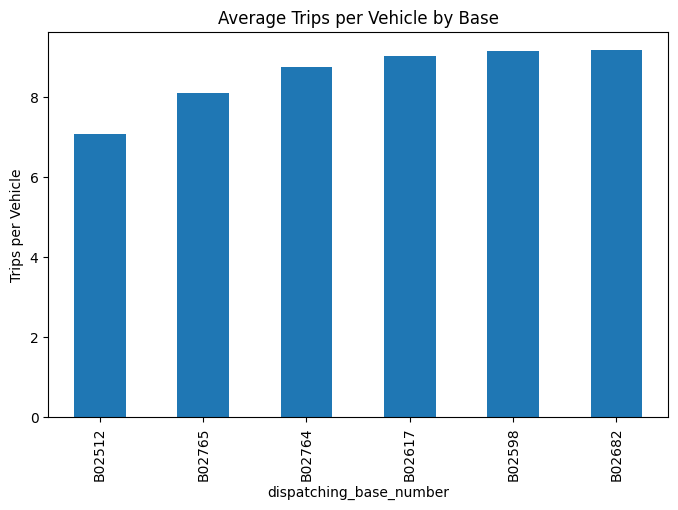

In [73]:
import matplotlib.pyplot as plt

base_eff = df.groupby("dispatching_base_number")["trips_per_vehicle"].mean().sort_values()

base_eff.plot(kind="bar", figsize=(8,5))
plt.title("Average Trips per Vehicle by Base")
plt.ylabel("Trips per Vehicle")
plt.show()


Base B02682 demonstrates the highest operational efficiency, achieving more trips per active vehicle compared to other bases. This may indicate better demand allocation, driver utilization, or geographic advantage.

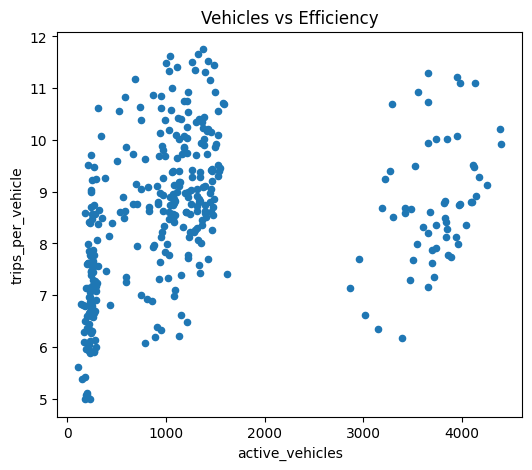

In [74]:
df.plot.scatter(x="active_vehicles", y="trips_per_vehicle", figsize=(6,5))
plt.title("Vehicles vs Efficiency")
plt.show()


The relationship between active vehicles and trips per vehicle suggests diminishing returns at higher fleet sizes. While increasing the number of vehicles initially improves operational efficiency, very large fleet sizes may lead to oversupply and reduced utilization per vehicle.

In [75]:
df[["active_vehicles", "trips_per_vehicle"]].corr()


,active_vehicles,trips_per_vehicle
active_vehicles,1.000000,0.293823
trips_per_vehicle,0.293823,1.000000


In [76]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["weekday"] = df["date"].dt.day_name()


In [77]:
df.groupby("weekday")["trips"].sum().sort_values(ascending=False)


,trips
weekday,
Saturday,751325
Friday,711192
Thursday,665647
Wednesday,531263
Sunday,523943
Tuesday,483061
Monday,463799


In [78]:
df.groupby("weekday")["trips"].sum().sort_values(ascending=False)


,trips
weekday,
Saturday,751325
Friday,711192
Thursday,665647
Wednesday,531263
Sunday,523943
Tuesday,483061
Monday,463799


In [79]:
df["is_weekend"] = df["weekday"].isin(["Saturday", "Sunday"])

df.groupby("is_weekend")["trips"].mean()


,trips
is_weekend,
False,11329.214286
True,12502.627451


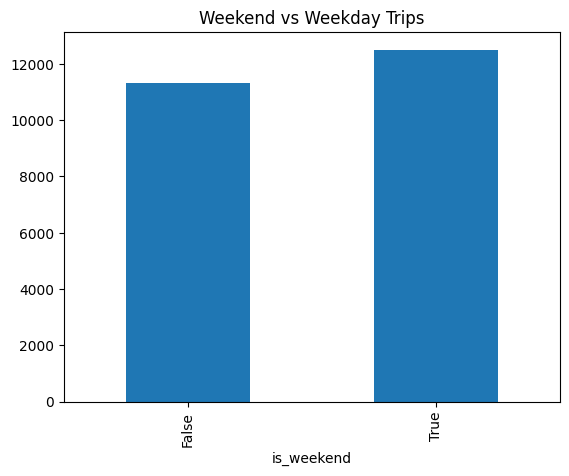

In [80]:
df.groupby("is_weekend")["trips"].mean().plot(kind="bar")
plt.title("Weekend vs Weekday Trips")
plt.show()


In [81]:
daily_trips = df.groupby("date")["trips"].sum().reset_index()

daily_trips["rolling_mean"] = daily_trips["trips"].rolling(window=7).mean()


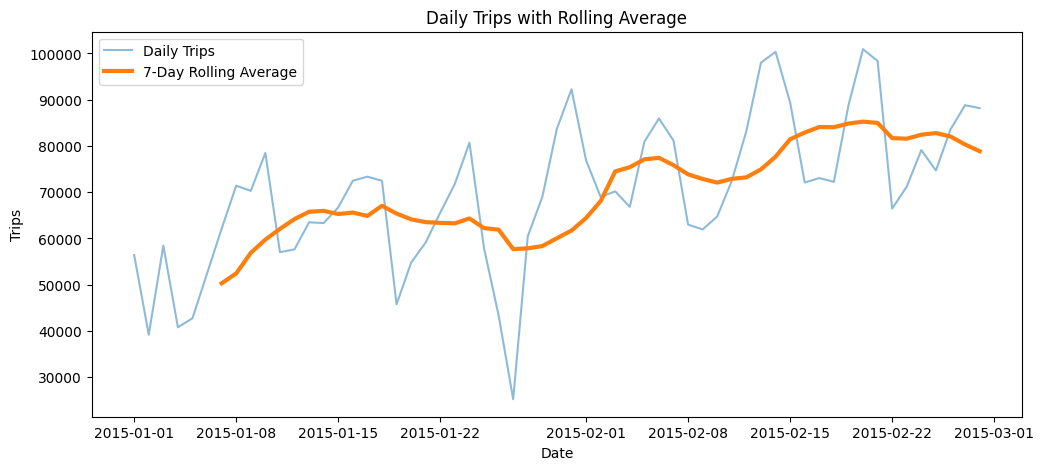

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.plot(daily_trips["date"], daily_trips["trips"], label="Daily Trips", alpha=0.5)
plt.plot(daily_trips["date"], daily_trips["rolling_mean"], label="7-Day Rolling Average", linewidth=3)

plt.legend()
plt.title("Daily Trips with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Trips")

plt.show()


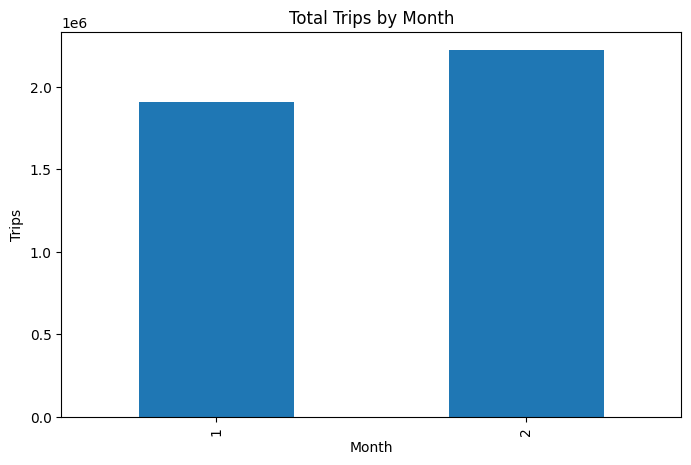

In [83]:
df.groupby("month")["trips"].sum().plot(kind="bar", figsize=(8,5))

plt.title("Total Trips by Month")
plt.xlabel("Month")
plt.ylabel("Trips")

plt.show()


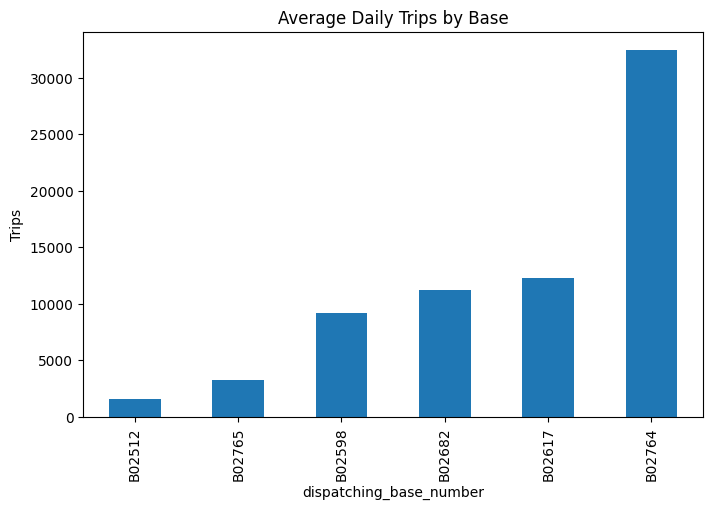

In [84]:
base_daily = df.groupby("dispatching_base_number")["trips"].mean().sort_values()

base_daily.plot(kind="bar", figsize=(8,5))

plt.title("Average Daily Trips by Base")
plt.ylabel("Trips")

plt.show()


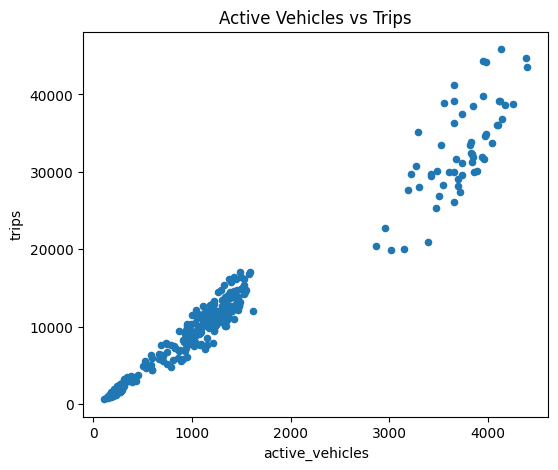

In [85]:
df.plot.scatter(x="active_vehicles", y="trips", figsize=(6,5))

plt.title("Active Vehicles vs Trips")

plt.show()


In [86]:
daily_trips = df.groupby("date")["trips"].sum().reset_index()
daily_trips = daily_trips.sort_values("date")


In [87]:
daily_trips["lag1"] = daily_trips["trips"].shift(1)
daily_trips["lag2"] = daily_trips["trips"].shift(2)
daily_trips["lag3"] = daily_trips["trips"].shift(3)
daily_trips["lag7"] = daily_trips["trips"].shift(7)

daily_trips = daily_trips.dropna()
daily_trips.head()


,date,trips,lag1,lag2,lag3,lag7
7,2015-01-08,71413,62102.0,52426.0,42752.0,56437.0
8,2015-01-09,70296,71413.0,62102.0,52426.0,39189.0
9,2015-01-10,78484,70296.0,71413.0,62102.0,58449.0
10,2015-01-11,57026,78484.0,70296.0,71413.0,40798.0
11,2015-01-12,57646,57026.0,78484.0,70296.0,42752.0


In [88]:
import pandas as pd
display(daily_trips.head())

,date,trips,lag1,lag2,lag3,lag7
7,2015-01-08,71413,62102.0,52426.0,42752.0,56437.0
8,2015-01-09,70296,71413.0,62102.0,52426.0,39189.0
9,2015-01-10,78484,70296.0,71413.0,62102.0,58449.0
10,2015-01-11,57026,78484.0,70296.0,71413.0,40798.0
11,2015-01-12,57646,57026.0,78484.0,70296.0,42752.0


In [89]:
split_index = int(len(daily_trips) * 0.8)

train = daily_trips[:split_index]
test = daily_trips[split_index:]


In [90]:
from sklearn.linear_model import LinearRegression

X_train = train[["lag1", "lag2", "lag3", "lag7"]]
y_train = train["trips"]

X_test = test[["lag1", "lag2", "lag3", "lag7"]]
y_test = test["trips"]

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 7554.930559841236
RMSE: 9908.178577002996


The baseline Linear Regression model achieved an MAE of approximately 7,500 trips, corresponding to roughly 10% error relative to the average demand level. This indicates that historical demand contains useful predictive patterns.

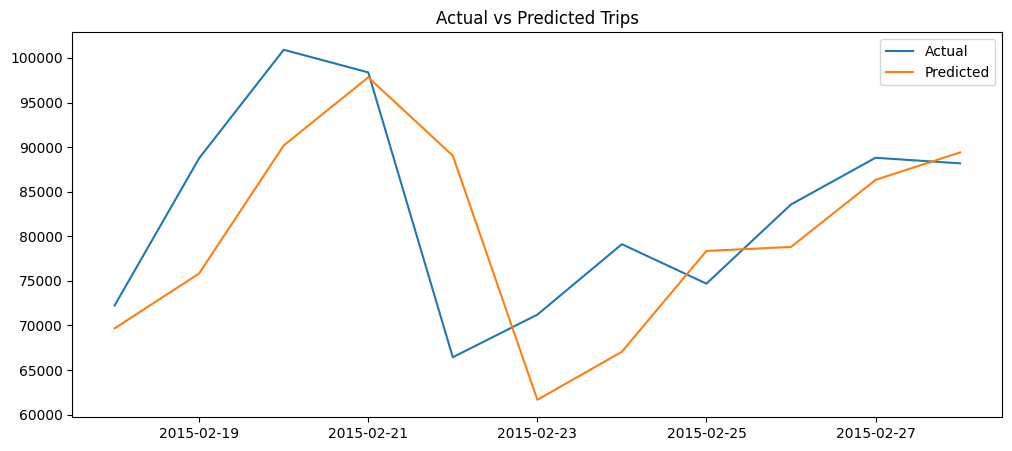

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.plot(test["date"], y_test, label="Actual")
plt.plot(test["date"], predictions, label="Predicted")

plt.legend()
plt.title("Actual vs Predicted Trips")

plt.show()


In [93]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)


In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)


Random Forest MAE: 7777.005454545456
Random Forest RMSE: 9986.738262450179


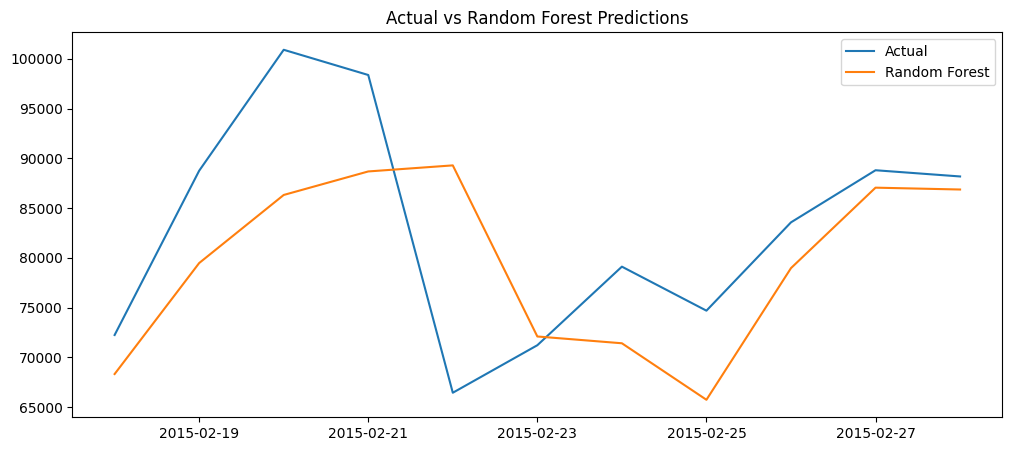

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.plot(test["date"], y_test, label="Actual")
plt.plot(test["date"], rf_predictions, label="Random Forest")

plt.legend()
plt.title("Actual vs Random Forest Predictions")

plt.show()


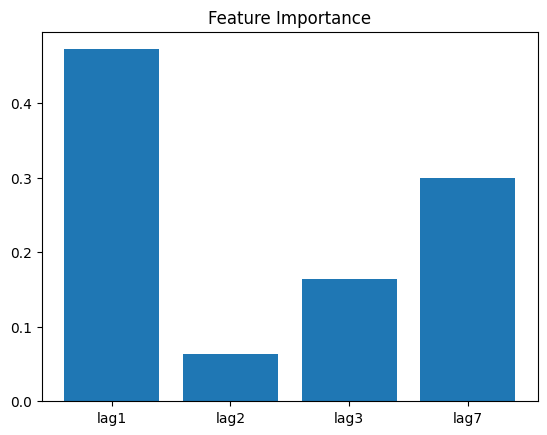

In [96]:
importance = rf_model.feature_importances_

features = X_train.columns

plt.bar(features, importance)
plt.title("Feature Importance")
plt.show()


In [97]:
daily_trips["rolling_mean_3"] = daily_trips["trips"].rolling(3).mean()
daily_trips["rolling_mean_7"] = daily_trips["trips"].rolling(7).mean()

daily_trips["trend"] = range(len(daily_trips))

daily_trips["weekday"] = daily_trips["date"].dt.weekday


In [98]:
daily_trips = daily_trips.dropna()


In [99]:
features = [
    "lag1", "lag2", "lag3", "lag7",
    "rolling_mean_3", "rolling_mean_7",
    "trend", "weekday"
]

X = daily_trips[features]
y = daily_trips["trips"]


In [100]:
split_index = int(len(daily_trips) * 0.8)

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

In [101]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

In [102]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 5702.209666666667
RMSE: 8898.851651388697


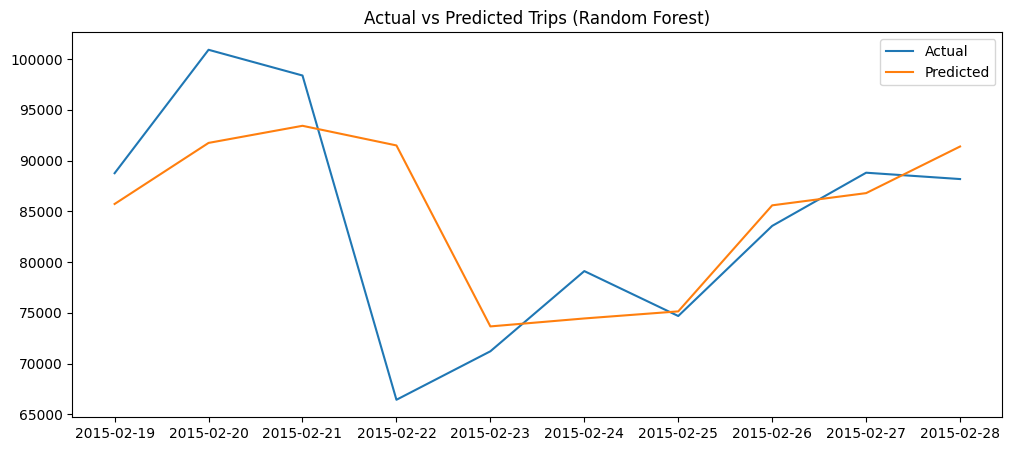

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.plot(daily_trips["date"].iloc[split_index:], y_test, label="Actual")
plt.plot(daily_trips["date"].iloc[split_index:], predictions, label="Predicted")

plt.legend()
plt.title("Actual vs Predicted Trips (Random Forest)")

plt.show()

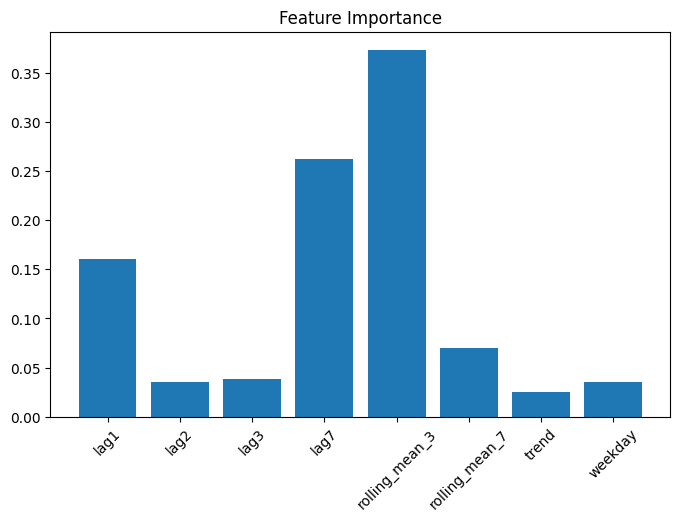

In [104]:
importance = rf_model.feature_importances_

plt.figure(figsize=(8,5))
plt.bar(features, importance)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

After introducing temporal features such as rolling averages, trend index, and weekday information, the Random Forest model achieved a significant improvement in performance, reducing the MAE from approximately 7,500 to 5,700 trips. This demonstrates the importance of feature engineering in time series forecasting problems.